In [4]:
%pip install dask
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: c:\Users\maxvi\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/28.0 MB ? eta -:--:--
   ---- ----------------------------------- 2.9/28.0 MB 16.7 MB/s eta 0:00:02
   --------- ------------------------------ 6.6/28.0 MB 16.8 MB/s eta 0:00:02
   -------------- ------------------------- 10.0/28.0 MB 16.3 MB/s eta 0:00:02
   ------------------- -------------------- 13.4/28.0 MB 16.1 MB/s eta 0:00:01
   ---------------------- ----------------- 16.0/28.0 MB 15.2 MB/s eta 0:00:01
   ------------------------- -------------- 17.8/28.0 MB 14.4 MB/s eta 0:00:01
   ----------------------------- ---------- 20.7/28.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------- ----- 24.1/28.0 MB 14.3 MB/s eta 0:00:01
   ------------------------------------- -- 26.5/28.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------  27.8/28.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 28.0/28.0 MB 13.0 MB/s  0:00:02
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: c:\Users\maxvi\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


In [1]:
import dask
import dask.dataframe as dd
# When dask uses pandas 2.0.0+ it casts object columns to string automatically ([("i", 0.48)] -> '[("i", 0.48)]')
dask.config.set({"dataframe.convert-string": False})

dataset_path = r"C:\Users\maxvi\Downloads\smadex-challenge-predict-the-revenue\train"
filters = [("datetime", ">=", "2025-10-01-00-00"), ("datetime", "<", "2025-10-13-00-00")]

ddf = dd.read_parquet(
    dataset_path,
    filters=filters
)


In [2]:
# Convertim la Sèrie de Dtypes a un DataFrame i després a llista
dtypes_list = ddf.dtypes.to_frame().reset_index().values.tolist()

# Imprimeix la llista completa. Això és menys probable que es trunqui
for column, dtype in dtypes_list:
    print(f"{column}: {dtype}")

buyer_d1: int32
buyer_d7: int32
buyer_d14: int32
buyer_d28: int32
buy_d7: int64
buy_d14: int64
buy_d28: int64
iap_revenue_d7: float64
iap_revenue_d14: float64
iap_revenue_d28: float64
registration: int32
retention_d1_to_d7: int32
retention_d3_to_d7: int32
retention_d7_to_d14: int32
retention_d1: int32
retention_d3: int32
retentiond7: int32
advertiser_bundle: object
advertiser_category: object
advertiser_subcategory: object
advertiser_bottom_taxonomy_level: object
carrier: object
country: object
region: object
dev_make: object
dev_model: object
dev_os: object
dev_osv: object
hour: object
release_date: object
release_msrp: int64
weekday: int32
avg_act_days: float64
avg_daily_sessions: object
avg_days_ins: float64
avg_duration: object
bcat: object
bcat_bottom_taxonomy: object
bundles_cat: object
bundles_cat_bottom_taxonomy: object
bundles_ins: object
city_hist: object
country_hist: object
cpm: object
cpm_pct_rk: object
ctr: object
ctr_pct_rk: object
dev_language_hist: object
dev_osv_hist:

In [3]:
ddf_min = ddf[['iap_revenue_d7','buyer_d7','buy_d7','retention_d3_to_d7','advertiser_category','release_msrp','weeks_since_first_seen','rev_by_adv']]
ddf_min.head()


,iap_revenue_d7,buyer_d7,buy_d7,retention_d3_to_d7,advertiser_category,release_msrp,weeks_since_first_seen,rev_by_adv
0,2.147718,1,1,1.0,game,NaN,6.0,None
1,0.000000,0,0,0.0,sport betting,1380.0,NaN,None
2,0.000000,0,0,1.0,games,1199.0,6.0,None
3,0.000000,0,0,NaN,sport betting,227.0,6.0,None
4,0.000000,0,0,0.0,game,299.0,6.0,None


In [36]:
# Drop de totes les files amb NaN en qualsevol columna


ddf_min_clean = ddf_min.fillna(0)


In [37]:
ddf_min_clean.head()

,iap_revenue_d7,buyer_d7,buy_d7,retention_d3_to_d7,advertiser_category,release_msrp,weeks_since_first_seen,rev_by_adv
0,2.147718,1,1,1.0,game,0.0,6.0,0
1,0.000000,0,0,0.0,sport betting,1380.0,0.0,0
2,0.000000,0,0,1.0,games,1199.0,6.0,0
3,0.000000,0,0,0.0,sport betting,227.0,6.0,0
4,0.000000,0,0,0.0,game,299.0,6.0,0


In [38]:
value_counts = ddf_min_clean['iap_revenue_d7'].value_counts().compute()


In [39]:
import pandas as pd
import numpy as np
import verifyml.model_card_toolkit as mctlib
import verifyml.model_tests.utils as utils
import seaborn as sns
import uuid
import matplotlib.pyplot as plt

from datetime import date
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from IPython.display import Markdown, HTML

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [40]:
import numpy as np

# 1. Transformació logarítmica del target
ddf_min_clean['log_iap_revenue_d7'] = ddf_min_clean['iap_revenue_d7'].apply(
    lambda x: np.log1p(x), 
    meta=('log_iap_revenue_d7', 'float64')
)

# 2. Crea la variable 'y' utilitzant el target transformat
y = ddf_min_clean['log_iap_revenue_d7']

# 3. Elimina el target original i la variable auxiliar 'buyer_d7' del set de features X
X = ddf_min_clean.drop(columns=['iap_revenue_d7', 'log_iap_revenue_d7', 'buyer_d7'])

In [41]:
# Columna a codificar
# Columna a codificar
categorical_col = 'advertiser_category'

# 1. Converteix la columna a tipus 'category' (fet al pas anterior)
X[categorical_col] = X[categorical_col].astype('category') 

# ⚠️ 2. FORÇA DASK A CONÈIXER TOTS ELS VALORS ÚNICS
# Aquest pas executa un petit càlcul per trobar totes les categories
X[categorical_col] = X[categorical_col].cat.as_known()

# 3. Ara aplica el One-Hot Encoding (hauria de funcionar)
X = dd.get_dummies(
    X, 
    columns=[categorical_col], 
    prefix='cat', 
    drop_first=True
)
# 3. Comprova les columnes noves (opcional, requerirà .compute() si ho fas amb .head())
# print(X.columns)

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error, mean_squared_error

# --- 1. Materialització de Dades (fet segons la teva sortida) ---
X_pd = X.compute() 
y_pd = y.compute() 

# Columnes objectes problemàtiques identificades:
problematic_cols = ['rev_by_adv']

print("Aplicant neteja final a columnes 'object'...")

# --- 2. Conversió Forçada a Numèric i Neteja ---
for col in problematic_cols:
    # 2.1. Intentem convertir a numèric. 'coerce' reemplaçarà qualsevol valor 
    # no numèric (com cadenes de text o nuls residuals) amb NaN.
    X_pd[col] = pd.to_numeric(X_pd[col], errors='coerce') 
    
    # 2.2. Omplim els NaNs resultants amb 0, ja que són mètriques d'historial
    X_pd[col] = X_pd[col].fillna(0).astype('float32') # Utilitzem float32 per estalviar espai

# --- 3. Conversió de Booleans a Int (Per seguretat) ---
bool_cols = X_pd.select_dtypes(include=['bool']).columns
for col in bool_cols:
    X_pd[col] = X_pd[col].astype(int)

# --- 4. Divisió Train/Test ---
# Les dades X_pd ja haurien de ser completament numèriques
X_train, X_test, y_train, y_test = train_test_split(
    X_pd, 
    y_pd, 
    test_size=0.2, 
    random_state=42
)

print("\nDivisió de dades completada. Començant l'entrenament.")
print(f"Mida X_train: {X_train.shape}, Mida X_test: {X_test.shape}")

Aplicant neteja final a columnes 'object'...

Divisió de dades completada. Començant l'entrenament.
Mida X_train: (16480464, 27), Mida X_test: (4120116, 27)


In [79]:
# --- 1. Preparació per al Model de Dos Passos ---
# Cal la y_train original (ingressos sense log1p) per saber qui ha comprat.
# Com que y_train ja és la versió log1p, desfem la transformació:
y_train_original = np.expm1(y_train)

# 1.1. Crear la variable de Classificació (y_class)
y_class = (y_train_original > 0).astype(int) # 1 si compra, 0 si no

# 1.2. Crear el subconjunt de Regressió (només compradors)
# Filtrem X_train i y_train on l'ingrés és positiu
X_train_reg = X_train[y_train > 0] 
y_train_reg = y_train[y_train > 0] 

# ----------------------------------------------------------------------
# 2. ENTRENAMENT DEL CLASSIFICADOR (MODEL 1)
# ----------------------------------------------------------------------
import lightgbm as lgb
# ...

# ----------------------------------------------------------------------
# 2. ENTRENAMENT DEL CLASSIFICADOR (MODEL 1)
# ----------------------------------------------------------------------
print("Entrenant Classificador Binari (Model 1)...")

lgb_classifier = lgb.LGBMClassifier(
    objective='binary',
    metric='auc', 
    is_unbalance=True, 
    random_state=42,
    # --- NOUS PARÀMETRES DE REGULARITZACIÓ ---
    min_child_samples=40,   # Augmentar d'un valor per defecte (p. ex., 20) a 40 o més
    lambda_l1=0.1,          # Regularització L1 (penalitza pesos grans)
    lambda_l2=0.1,          # Regularització L2
    # ----------------------------------------
    n_estimators=200       # Pots provar d'augmentar-ho si hi ha molt de canvi
)
lgb_classifier.fit(X_train, y_class) 

# ----------------------------------------------------------------------
# 3. ENTRENAMENT DEL REGRESSOR (MODEL 2)
# ----------------------------------------------------------------------
print("Entrenant Regressor (Model 2) només amb compradors...")

# Model de Regressió: DECIDEIX QUANT COMPRARÀ (sense canvis necessaris aquí)
lgb_regressor = lgb.LGBMRegressor(
    objective='regression_l1',
    metric='rmse',
    n_estimators=200, 
    learning_rate=0.1,
    random_state=42
)
# ... entrenar lgb_regressor ...

# Entrenar el Regressor només amb les dades dels compradors
lgb_regressor.fit(X_train_reg, y_train_reg)

print("✅ Models (Classificador i Regressor) entrenats amb èxit!")
# np.log1p(x) > 0 implica x > 0.
# Així que podem comprovar si y_train és positiva:
# sample_weights = np.where(y_train > 0, POSITIVE_WEIGHT, BASE_WEIGHT) 
# Aquesta segona opció és més segura si només tens la versió transformada.

Entrenant Classificador Binari (Model 1)...
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 484426, number of negative: 15996038
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.766888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 16480464, number of used features: 26
[LightGBM] [Info] [binary:BoostF

In [ ]:
# --- 6. Predicció i Avaluació (Model de Dos Passos) ---
# Hem de replicar la lògica de Classificador + Regressor per a l'avaluació al Test.

# 1. Classificació: Predir els compradors potencials al conjunt X_test
buyer_probabilities_test = lgb_classifier.predict_proba(X_test)[:, 1]

# 2. Selecció: Apliquem el LLINDAR ESTRICTE per decidir qui és comprador.
# Usa el mateix valor (p. ex., 0.8) que has provat a la predicció final.
STRICT_THRESHOLD = 0.00510 # <--- Posa aquí el llindar que millor et funcioni!
is_predicted_buyer_test = (buyer_probabilities_test > STRICT_THRESHOLD) 

# 3. Separar el conjunt X_test per als candidats a comprador
X_test_buyers = X_test[is_predicted_buyer_test]

# 4. Inicialitzar la predicció d'ingressos logarítmica final a Zero per a tothom
y_pred_log_two_step = np.zeros(len(X_test)) 

# 5. Regressió: Predir l'ingrés només per als candidats a comprador
if len(X_test_buyers) > 0:
    y_pred_log_buyers_test = lgb_regressor.predict(X_test_buyers)
    
    # 6. Assignar els valors predits a les posicions correctes de l'array final
    y_pred_log_two_step[is_predicted_buyer_test] = y_pred_log_buyers_test
    
y_pred_log = y_pred_log_two_step # Renombrar per continuar amb la resta del teu codi

# Desfer la transformació logarítmica (e^x - 1)
y_pred_real = np.expm1(y_pred_log)
# Això s'executa després de la predicció al test set (y_pred_real)
num_zeros = (y_pred_real == 0).sum()
num_total = len(y_pred_real)

print(f"Total de prediccions: {num_total}")
print(f"Prediccions exactament iguals a 0: {num_zeros}")
print(f"Percentatge de prediccions a 0: {100 * (num_zeros / num_total):.2f}%")
print(f"Mínim de les prediccions: {y_pred_real.min():.4f}")
print(f"Màxim de les prediccions: {y_pred_real.max():.4f}")

# Si el teu mínim és molt proper a zero (p. ex., 1e-10) però no exactament zero, 
# el model ja està predient valors positius.
y_test_real = np.expm1(y_test)

# Asegurar que els ingressos predits no són negatius
y_pred_real[y_pred_real < 0] = 0

# Calcular MSLE (Mean Squared Logarithmic Error)
msle_score = mean_squared_log_error(y_test_real, y_pred_real)
mse_score = mean_squared_error(y_test_real, y_pred_real)
rmse_score = np.sqrt(mse_score) # Apliquem l'arrel quadrada sobre l'MSE

print("\n--- Resultats del Model LightGBM ---")
print(f"MSLE (Mètrica del Repte): {msle_score:.6f}")
print(f"RMSE (Escala Real): {rmse_score:.2f} USD")
# Si el teu mínim és molt proper a zero (p. ex., 1e-10) però no exactament zero, 
# el model ja està predient valors positius.
y_test_real = np.expm1(y_test)

# Asegurar que els ingressos predits no són negatius
y_pred_real[y_pred_real < 0] = 0

# Calcular MSLE (Mean Squared Logarithmic Error)
msle_score = mean_squared_log_error(y_test_real, y_pred_real)
mse_score = mean_squared_error(y_test_real, y_pred_real)
rmse_score = np.sqrt(mse_score) # Apliquem l'arrel quadrada sobre l'MSE

print("\n--- Resultats del Model LightGBM ---")
print(f"MSLE (Mètrica del Repte): {msle_score:.6f}")
print(f"RMSE (Escala Real): {rmse_score:.2f} USD")

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
Total de prediccions: 4120116
Prediccions exactament iguals a 0: 3985388
Percentatge de prediccions a 0: 96.73%
Mínim de les prediccions: -0.0146
Màxim de les prediccions: 1096.1954

--- Resultats del Model LightGBM ---
MSLE (Mètrica del Repte): 0.046529
RMSE (Escala Real): 288.38 USD

--- Resultats del Model LightGBM ---
MSLE (Mètrica del Repte): 0.046529
RMSE (Escala Real): 288.38 USD


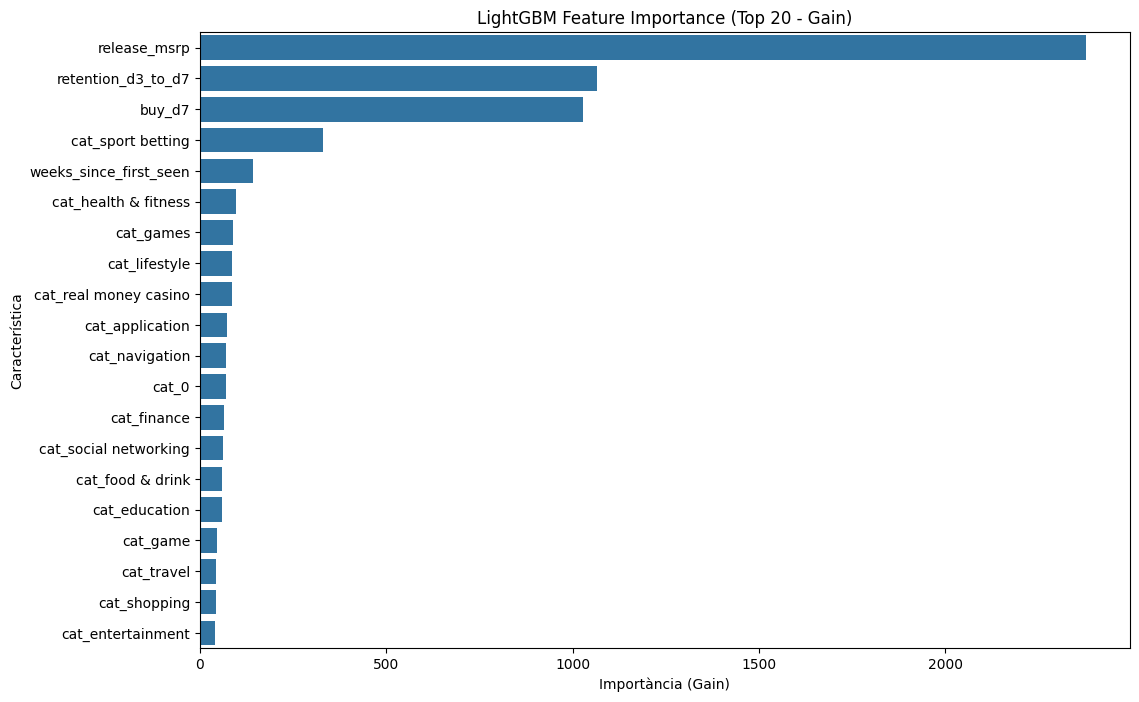


Total de característiques usades: 27
Total de característiques amb Importància > 0: 23


In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Obtenció de la importància de característiques (Tipus 'gain' per defecte en LightGBM)
# Aquest pas assumeix que el teu model entrenat es diu 'lgb_regressor'
feature_imp = pd.Series(
    lgb_regressor.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

# 2. Creació d'un DataFrame per a la visualització
df_feature_imp = pd.DataFrame(feature_imp, columns=['Importance']).reset_index()
df_feature_imp.columns = ['Feature', 'Importance']

# 3. Visualització (mostrant el top 20)
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=df_feature_imp.head(20))
plt.title('LightGBM Feature Importance (Top 20 - Gain)')
plt.xlabel('Importància (Gain)')
plt.ylabel('Característica')
plt.show()

# 4. Identificar característiques inútils
features_to_keep = df_feature_imp[df_feature_imp['Importance'] > 0]['Feature'].tolist()
print(f"\nTotal de característiques usades: {len(X_train.columns)}")
print(f"Total de característiques amb Importància > 0: {len(features_to_keep)}")

In [104]:
import dask.dataframe as dd
import pandas as pd
import numpy as np

# --- Configuració ---
test_dataset_path = r"C:\Users\maxvi\Downloads\smadex-challenge-predict-the-revenue\test" # Assegura't que la ruta és correcta
categorical_col = 'advertiser_category'


# --- Càrrega i Selecció de Columnes ---
# Incloem totes les cols que vas usar + 'row_id'
cols_used_in_train = X_train.columns.tolist()
cols_to_load = list(set(['row_id', 'datetime', categorical_col, 'release_msrp', 'weeks_since_first_seen']))

ddf_test = dd.read_parquet(test_dataset_path)[cols_to_load]

# --- 1. Enginyeria de Característiques Temporals ---
ddf_test['datetime'] = dd.to_datetime(ddf_test['datetime'])
ddf_test['install_hour'] = ddf_test['datetime'].dt.hour
ddf_test['install_day'] = ddf_test['datetime'].dt.day
ddf_test['install_day_of_week'] = ddf_test['datetime'].dt.dayofweek
X_test_dask = ddf_test.drop(columns=['datetime'])

# --- 2. Gestió de Columnes que Falten ---
# Com que 'buy_d7' i 'retention_d3_to_d7' no estan al test set, les creem com a 0 o False.
# Hem d'assumir un valor per aquestes variables. Una assumpció segura és 'False' (o 0).
if 'buy_d7' in cols_used_in_train:
    X_test_dask['buy_d7'] = 0 
if 'retention_d3_to_d7' in cols_used_in_train:
    X_test_dask['retention_d3_to_d7'] = 0

# --- 3. One-Hot Encoding ---
# S'ha de convertir a 'category' i usar 'as_known()'
X_test_dask[categorical_col] = X_test_dask[categorical_col].astype('category')
X_test_dask[categorical_col] = X_test_dask[categorical_col].cat.as_known()
X_test_dask = dd.get_dummies(X_test_dask, columns=[categorical_col], prefix='cat', drop_first=True)

# --- 4. Materialització Final ---
print("Materialitzant el Test Set a Pandas...")
X_test_pd = X_test_dask.compute()
print("Materialització completada.")

Materialitzant el Test Set a Pandas...
Materialització completada.


In [ ]:
import pandas as pd
import numpy as np

# Columnes d'Objecte problemàtiques identificades en el train set
problematic_cols = [] 

# --- 5. Neteja de les columnes 'Object' (iap_revenue_usd_...) ---
# Assegura la conversió final de les mètriques d'historial a numèric
for col in problematic_cols:
    X_test_pd[col] = pd.to_numeric(X_test_pd[col], errors='coerce').fillna(0).astype('float32')

# --- 6. Preparació Final de Columnes (CRUCIAL) ---

# ⚠️ CORRECCIÓ CLAU: Guardar el 'row_id' des del DataFrame de prova (X_test_pd)
# Aquest pas requereix que X_test_pd encara contingui la columna 'row_id'
row_ids = X_test_pd['row_id'] # <--- CORRECCIÓ! Utilitza X_test_pd

# 6.1. Afegir columnes d'OHE que falten (si hi ha categories al Train que no estan al Test)
missing_cols = set(X_train.columns) - set(X_test_pd.columns)
for c in missing_cols:
    X_test_pd[c] = 0

# 6.2. Eliminar columnes sobrants (si el Test té categories que no hi havia al Train)
extra_cols = set(X_test_pd.columns) - set(X_train.columns)
if extra_cols:
    X_test_pd = X_test_pd.drop(columns=extra_cols, axis=1)

# 6.3. Reordenar les columnes perquè coincideixin EXACTAMENT amb X_train
X_test_pd = X_test_pd[X_train.columns]

# ... [El teu codi de preparació de X_test_pd i row_ids] ...

# --- 7. Predicció amb el Model de Dos Passos ---
print("Realitzant prediccions amb el Model de Dos Passos...")

# 1. Classificació: Predir la probabilitat de ser comprador
buyer_probabilities = lgb_classifier.predict_proba(X_test_pd)[:, 1]

# 2. Selecció: Utilitza el MATEIX LLINDAR ESTRICTE que has trobat òptim a l'avaluació
STRICT_THRESHOLD = 0.00510
is_predicted_buyer = (buyer_probabilities > STRICT_THRESHOLD) 

# 3. Separar les dades de Test dels que el Classificador creu que compraran
X_test_buyers = X_test_pd[is_predicted_buyer]

# 4. Inicialitzar l'array de prediccions Finals amb ZEROS (LLARGADA COMPLETA)
y_pred_final_log = np.zeros(len(X_test_pd)) 

# 5. Regressió: Predir l'ingrés només per als candidats
if len(X_test_buyers) > 0:
    y_pred_log_buyers = lgb_regressor.predict(X_test_buyers)
    
    # 6. Col·locar les prediccions d'ingrés a les posicions correctes
    y_pred_final_log[is_predicted_buyer] = y_pred_log_buyers

# --- 8. Desfer la Transformació Logarítmica ---
y_pred_test_real = np.expm1(y_pred_final_log)
y_pred_test_real[y_pred_test_real < 0] = 0 

# --- 9. Generació del Fitxer de Submissió ---
submission_df = pd.DataFrame({
    'row_id': row_ids,
    'iap_revenue_d7': y_pred_test_real
})

# Guardar el fitxer
submission_df.to_csv('submission_final2.csv', index=False)
# ... [La resta del teu codi de resultats] ...

print("\n🎉 El fitxer 'submission_final2.csv' s'ha creat amb èxit!")
print(f"Mida de l'arxiu de submissió: {len(submission_df)} files.")

Realitzant prediccions amb el Model de Dos Passos...
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1

🎉 El fitxer 'submission_final.csv' s'ha creat amb èxit!
Mida de l'arxiu de submissió: 13188409 files.


In [106]:
import pandas as pd
import numpy as np

# Carregar el fitxer de submissió que acabes de crear
submission_file_path = 'submission_final.csv'
submission_df = pd.read_csv(submission_file_path)

# --- 1. Anàlisi del recompte de zeros ---

# Comprovar quants valors són *exactament* zero
num_zeros_pred = (submission_df['iap_revenue_d7'] == 0).sum()
total_predictions = len(submission_df)

print(f"Total de prediccions al fitxer: {total_predictions}")
print(f"Prediccions exactament iguals a 0: {num_zeros_pred}")
print(f"Percentatge de prediccions a 0: {100 * (num_zeros_pred / total_predictions):.2f}%")

# --- 2. Anàlisi Estadística ---

print("\n--- Estadístiques de les Prediccions d'Ingressos ---")
print(submission_df['iap_revenue_d7'].describe().apply(lambda x: f"{x:,.4f}"))

# --- 3. Verificar el Top 5 de Prediccions (els possibles 'whales') ---
print("\nTop 5 Prediccions d'Ingressos (Whales):")
print(submission_df.sort_values(by='iap_revenue_d7', ascending=False).head(5))

Total de prediccions al fitxer: 13188409
Prediccions exactament iguals a 0: 13188409
Percentatge de prediccions a 0: 100.00%

--- Estadístiques de les Prediccions d'Ingressos ---
count    13,188,409.0000
mean              0.0000
std               0.0000
min               0.0000
25%               0.0000
50%               0.0000
75%               0.0000
max               0.0000
Name: iap_revenue_d7, dtype: object

Top 5 Prediccions d'Ingressos (Whales):
                                 row_id  iap_revenue_d7
0  e2f514a9-d922-4a17-bf94-f228bf4cd82f             0.0
1  4bfc70d3-d619-410a-9683-4cd759f30f32             0.0
2  ad433b66-b41e-4157-a6fd-24cd30701f6a             0.0
3  5ed964d6-ddce-42e8-9fad-276eb7f64c2f             0.0
4  81b73a45-c395-4d08-a4a3-513873440db3             0.0
